In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
df = pd.read_csv("listings.csv")

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [237]:
df.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [238]:
cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', "price", "number_of_reviews", "room_type", "host_listings_count", 
        "review_scores_location", "review_scores_rating", "minimum_nights", "guests_included", "property_type", "amenities"]

In [239]:
df_1 = df

In [240]:
df_1.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [241]:
df_1.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [242]:
df_1

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [243]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val


def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''

    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0

    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)

    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)

    return

split_list_into_columns(df_1, "amenities")

In [244]:
#define a coulumn which counts the number of items in "amenities" attri 
# df_1["amenities_score"] = df_1["amenities"].apply(lambda x : len(x))

In [245]:
df_1.head(30)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [246]:
df_1["price"] = df_1["price"].apply(lambda x : float(x.replace("$", "").replace(",", "")))

In [247]:
def priceCat(x):
    if x>=0 and x<=75:
        return 0
    elif x>=76 and x<=120:
        return 1
    elif x>=121 and x<=200:
        return 2
    elif x >= 201 and x<= 300:
        return 3
    elif x>=301:
        return 4
    else:
        return np.nan
    
df_1["price"] = df_1["price"].apply(priceCat)

In [248]:
df_1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'amenities_Wireless Internet', 'amenities_Heating', 'amenities_Kitchen',
       'amenities_Smoke Detector', 'amenities_Essentials', 'amenities_Dryer',
       'amenities_Washer', 'amenities_Internet', 'amenities_Shampoo',
       'amenities_TV'],
      dtype='object', length=102)

In [249]:
df_1.head(40)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [250]:
numericList = list(df_1.select_dtypes(["int64", "float64"]).columns)
categoricalList = list(df_1.select_dtypes("object").columns)

In [251]:
numericList

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month',
 'amenities_Wireless Internet',
 'amenities_Heating',
 'amenities_Kitchen',
 'amenities_Smoke Detector',
 'amenities_Essentials',
 'amenities_Dryer',
 'amenities_Washer',
 'amenities_Internet',
 'amenities_Shampoo',
 'amenities_TV']

In [252]:
categoricalList

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license'

In [253]:
df_1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,0.960450,0.949974,0.896543,0.859350,0.847826,0.784966,0.783656,0.736249,0.699319,0.674175
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,0.194924,0.218028,0.304595,0.347705,0.359236,0.410900,0.411805,0.440723,0.458614,0.468744
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
df_1.shape

(3818, 102)

In [255]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 102 entries, id to amenities_TV
dtypes: float64(27), int64(14), object(61)
memory usage: 3.0+ MB


<AxesSubplot:>

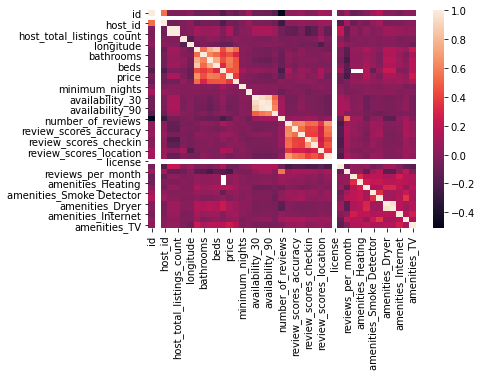

In [256]:
sns.heatmap(df_1.corr())

In [257]:
X = df_1.drop(columns=["price"], axis=1)
y = df_1["price"]

In [258]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [259]:
numericList.remove("price")

In [260]:
numericList

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month',
 'amenities_Wireless Internet',
 'amenities_Heating',
 'amenities_Kitchen',
 'amenities_Smoke Detector',
 'amenities_Essentials',
 'amenities_Dryer',
 'amenities_Washer',
 'amenities_Internet',
 'amenities_Shampoo',
 'amenities_TV']

In [261]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
transformers= [
    ("num", numeric_transformer, numericList),
    ("cat", categorical_transformer, categoricalList)
])

In [262]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

preprocessor = ColumnTransformer(
transformers= [
    ("num", numeric_transformer, numericList),
    ("cat", categorical_transformer, categoricalList)
])

clf= Pipeline(steps=[("preprocessor", preprocessor),
                        ("RF", RandomForestRegressor(n_estimators=30))
                        ] )

clf.fit(X_train, y_train)

scores = cross_val_score(clf,X_test, y_test, cv=5)

print(f"Mean cross validation score RandomForestClassifier : {scores.mean()}")

print("model Test score: %.3f" % clf.score(X_test, y_test))


Mean cross validation score RandomForestClassifier : 0.5959079551567628
model Test score: 0.660


In [263]:
# pred=clf.predict(X_test)

# cm=confusion_matrix(y_test,clf.predict(X_test))
# sns.heatmap(cm,annot=True)

In [264]:
def function(n):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
        ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

    preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numericList),
        ("cat", categorical_transformer, categoricalList)
    ])

    clf= Pipeline(steps=[("preprocessor", preprocessor),
                            ("RF", RandomForestClassifier(n_estimators=n, 
                                   random_state=42, 
                                   n_jobs=-1))
                            ] )

    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
#     pred = np.array(map(priceCat, pred))
    print(f"This is n: {n}")
    print((pred == y_test).sum() / len(y_test))

    print("model Test score: %.3f" % clf.score(X_test, y_test))
    
    return clf.score(X_test, y_test)

In [265]:
scores = []


for i in range(1, 200, 5):
    score = function(i)
    scores.append(score)

This is n: 1
0.443717277486911
model Test score: 0.444
This is n: 6
0.5418848167539267
model Test score: 0.542
This is n: 11
0.581151832460733
model Test score: 0.581
This is n: 16
0.5785340314136126
model Test score: 0.579
This is n: 21
0.5955497382198953
model Test score: 0.596
This is n: 26
0.5916230366492147
model Test score: 0.592
This is n: 31
0.5916230366492147
model Test score: 0.592
This is n: 36
0.5955497382198953
model Test score: 0.596
This is n: 41
0.6034031413612565
model Test score: 0.603
This is n: 46
0.5942408376963351
model Test score: 0.594
This is n: 51
0.6047120418848168
model Test score: 0.605
This is n: 56
0.599476439790576
model Test score: 0.599
This is n: 61
0.6034031413612565
model Test score: 0.603
This is n: 66
0.6034031413612565
model Test score: 0.603
This is n: 71
0.6047120418848168
model Test score: 0.605
This is n: 76
0.6020942408376964
model Test score: 0.602
This is n: 81
0.6034031413612565
model Test score: 0.603
This is n: 86
0.5968586387434555
mod

<AxesSubplot:>

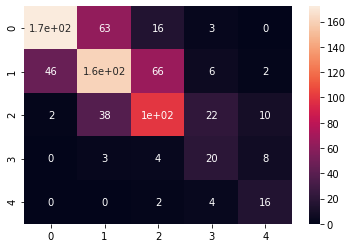

In [267]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True)

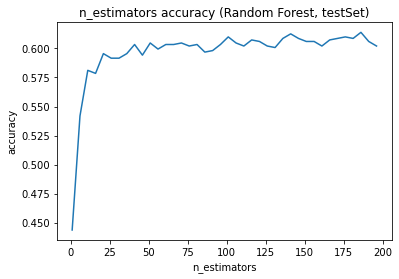

In [268]:
plt.plot(np.arange(1, 200, 5), np.array(scores))
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("n_estimators accuracy (Random Forest, testSet)")
plt.show()

In [209]:
scores.index(max(scores))

17

In [219]:
def function2(n):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
        ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

    preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numericList),
        ("cat", categorical_transformer, categoricalList)
    ])

    clf= Pipeline(steps=[("preprocessor", preprocessor),
                            ("RF", RandomForestClassifier(n_estimators=n, 
                                   random_state=42, 
                                   n_jobs=-1))
                            ] )

    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
#     pred = np.array(map(priceCat, pred))
    print(f"This is n: {n}")
    print((pred == y_test).sum() / len(y_test))

    print("model Test score: %.3f" % clf.score(X_train, y_train))
    
    return clf.score(X_train, y_train)

In [220]:
scores_train = []


for i in range(1, 200, 5):
    score = function2(i)
    scores_train.append(score)

This is n: 1
0.4397905759162304
model Test score: 0.805
This is n: 6
0.5615183246073299
model Test score: 0.954
This is n: 11
0.574607329842932
model Test score: 0.986
This is n: 16
0.5903141361256544
model Test score: 0.993
This is n: 21
0.5890052356020943
model Test score: 0.997
This is n: 26
0.6034031413612565
model Test score: 0.998
This is n: 31
0.5903141361256544
model Test score: 0.999
This is n: 36
0.5929319371727748
model Test score: 0.999
This is n: 41
0.5968586387434555
model Test score: 0.999
This is n: 46
0.599476439790576
model Test score: 0.999
This is n: 51
0.5981675392670157
model Test score: 0.999
This is n: 56
0.6020942408376964
model Test score: 0.999
This is n: 61
0.5968586387434555
model Test score: 0.999
This is n: 66
0.606020942408377
model Test score: 0.999
This is n: 71
0.6086387434554974
model Test score: 0.999
This is n: 76
0.612565445026178
model Test score: 0.999
This is n: 81
0.612565445026178
model Test score: 0.999
This is n: 86
0.6138743455497382
model

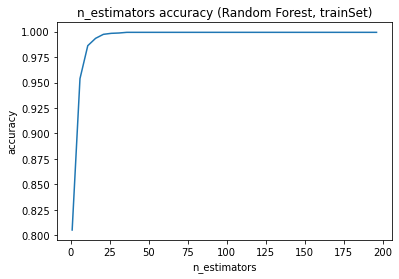

In [221]:
plt.plot(np.arange(1, 200, 5), np.array(scores_train))
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("n_estimators accuracy (Random Forest, trainSet)")
plt.show()

In [231]:
def function3(n):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
        ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

    preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numericList),
        ("cat", categorical_transformer, categoricalList)
    ])

    clf= Pipeline(steps=[("preprocessor", preprocessor),
                            ("RF", RandomForestClassifier(n_estimators=n, 
                                   random_state=42, 
                                   n_jobs=-1))
                            ] )

    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
#     pred = np.array(map(priceCat, pred))
    print(f"This is n: {n}")
    print((pred == y_test).sum() / len(y_test))

    print("model Test score: %.3f" % clf.score(X_test, y_test))
    
    return pred

In [232]:
pred  = function3(86)


This is n: 86
0.6138743455497382
model Test score: 0.614


In [233]:
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 4, 1, 1, 0, 2,
       1, 1, 0, 0, 4, 0, 2, 1, 1, 2, 3, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 3, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 4, 1, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 3, 2, 1, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 3, 1, 2, 2, 1, 2, 0,
       1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 3, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0,
       2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1,
       1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 4, 0, 3, 1, 3, 0, 0, 0, 1, 3, 0,
       0, 0, 1, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       0, 4, 0, 3, 0, 1, 0, 4, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1,
       2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1,

<AxesSubplot:>

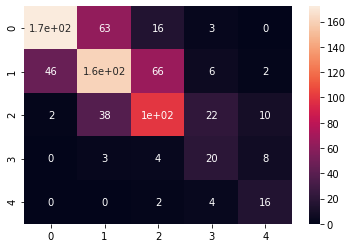

In [234]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True)